## Business Problem: Credit Card Fraud Detection

Credit card fraud is a significant concern for financial institutions, retailers, and consumers alike. Fraudulent transactions can result in substantial financial losses, reputational damage, and legal complications for businesses, while consumers may experience personal financial distress and loss of trust. The rise of online shopping, digital payments, and global commerce has increased the risk of fraud, making it a critical issue for companies that process millions of transactions daily. Fraudulent transactions are rare and often concealed among a large number of legitimate transactions, making detection difficult.

If the company fails to detect fraud in a timely manner, it risks financial losses, regulatory penalties, and loss of customer trust. Conversely, falsely labeling legitimate transactions as fraudulent (false positives) can lead to customer dissatisfaction, increased operational costs (from investigating false alerts), and revenue loss. Moreover, if a transaction is fraud and is not being identified has higher risk than vice versa.

The objective is to build a robust and accurate fraud detection system that can quickly and efficiently identify fraudulent transactions. The system should balance the need to catch as many fraudulent activities as possible (high recall) while minimizing the impact on legitimate transactions (low false positives). The end goal is to reduce fraud-related financial losses and enhance the customer experience by minimizing disruptions to legitimate transactions.

####Metrics to focus on:
Fraud Detection Rate (Recall): The percentage of actual frauds detected by the system. A high recall ensures that most fraud is caught.

Precision: The percentage of flagged transactions that are actually fraudulent. This ensures the system doesn't overwhelm fraud investigators with too many false alerts.

####Business Impact:
Implementing an effective credit card fraud detection system will: 

Reduce Financial Losses: Identifying fraudulent transactions early minimizes chargebacks, reimbursements, and other fraud-related losses.

Improve Operational Efficiency: Automation and machine learning reduce the need for manual transaction reviews and investigations, lowering operational costs.

Enhance Customer Experience: Accurately flagging fraud ensures that legitimate transactions are processed smoothly, increasing customer satisfaction and trust.

Regulatory Compliance: Meeting legal and industry standards for fraud prevention reduces the risk of penalties and legal action.

By addressing the fraud detection problem, the company can safeguard its financial assets, maintain customer trust, and ensure smoother operations. This proactive approach to managing credit card fraud is essential in an increasingly digital and globalized economy.

### Read the dataset

In [0]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc) 
spark_df = sqlContext.sql("Select * from fraud")
spark_df.count()

/databricks/spark/python/pyspark/sql/context.py:117: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Out[1]: 1296675

In [0]:
# Get number of rows
row_count = spark_df.count()

# Get number of columns
col_count = len(spark_df.columns)

# Approximate data size in bytes
data_size = spark_df.rdd.map(lambda row: len(str(row))).sum()

print(f"DataFrame Size: {row_count} rows, {col_count} columns, Approximate Size: {data_size} bytes")

DataFrame Size: 1296675 rows, 23 columns, Approximate Size: 620295691 bytes


In [0]:
from pyspark.sql.functions import col

# Convert 'is_fraud' column to integer type
spark_df = spark_df.withColumn("is_fraud", col("is_fraud").cast("int"))

# Verify the schema to ensure that the conversion is successful
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- trans_date_trans_time: string (nullable = true)
 |-- cc_num: integer (nullable = true)
 |-- merchant: string (nullable = true)
 |-- category: string (nullable = true)
 |-- amt: double (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- city_pop: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- trans_num: string (nullable = true)
 |-- unix_time: integer (nullable = true)
 |-- merch_lat: double (nullable = true)
 |-- merch_long: double (nullable = true)
 |-- is_fraud: integer (nullable = true)



### Data Visualizations

In [0]:
# Convert summary statistics to Pandas DataFrame
summary_df = spark_df.describe().toPandas()

# Set the index to the first column (which contains the metric names)
summary_df.set_index('summary', inplace=True)

# Transpose the DataFrame
transposed_summary_df = summary_df.transpose()

# Display the transposed DataFrame
transposed_summary_df

summary,count,mean,stddev,min,max
_c0,1296675,648337.0,374317.9744882685,0,1296674
trans_date_trans_time,1296675,None,None,2019-01-01 00:00:18,2020-06-21 12:13:37
cc_num,0,None,None,None,None
merchant,1296675,None,None,fraud_Abbott-Rogahn,fraud_Zulauf LLC
category,1296675,None,None,entertainment,travel
amt,1296675,70.35103545606984,160.3160385715275,1.0,28948.9
first,1296675,None,None,Aaron,Zachary
last,1296675,None,None,Abbott,Zuniga
gender,1296675,None,None,F,M
street,1296675,None,None,000 Jennifer Mills,99736 Rose Shoals Apt. 504


In [0]:

hypodf=spark_df.groupby('is_fraud').mean('amt')
hypodf.show()

+--------+-----------------+
|is_fraud|         avg(amt)|
+--------+-----------------+
|       1|531.3200919264589|
|       0|67.66710981259996|
+--------+-----------------+



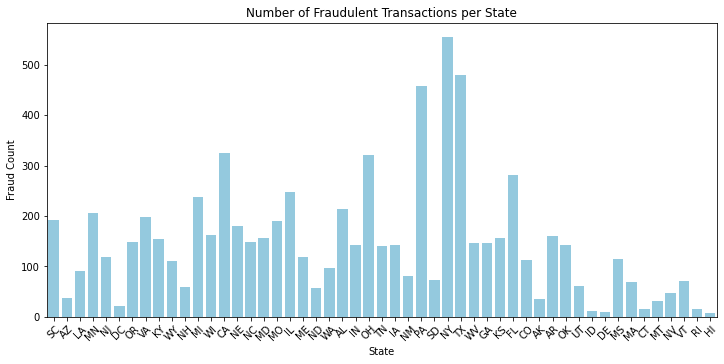

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_count_per_state = spark_df.filter(spark_df['is_fraud'] == 1).groupBy('state').count()
fraud_count_data = fraud_count_per_state.collect()
states = [row['state'] for row in fraud_count_data]
fraud_counts = [row['count'] for row in fraud_count_data]
plt.figure(figsize=(12, 6))
sns.barplot(x=states, y=fraud_counts, color='skyblue')

plt.title('Number of Fraudulent Transactions per State')
plt.xticks(rotation=45, ha='center', fontsize=10)
plt.subplots_adjust(bottom=0.2)
plt.xlabel('State')
plt.ylabel('Fraud Count')
plt.show()

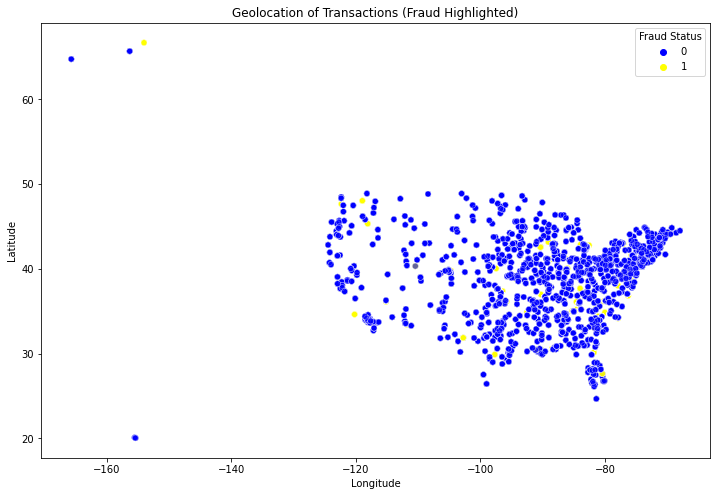

In [0]:
# Convert to Pandas for plotting
pandas_df = spark_df.select("lat", "long", "is_fraud").toPandas()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pandas_df, x="long", y="lat", hue="is_fraud", palette={0: "blue", 1: "yellow"}, alpha=0.6)
plt.title("Geolocation of Transactions (Fraud Highlighted)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Fraud Status", loc="upper right")
plt.show()

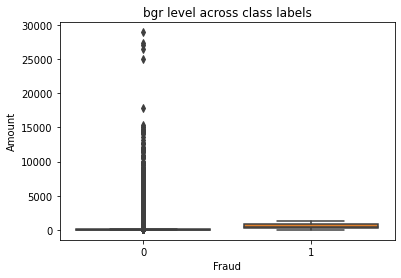

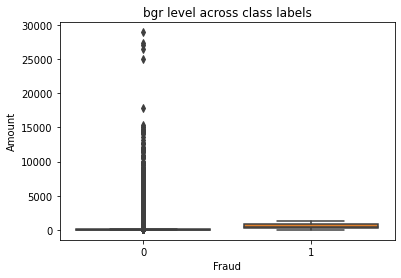

In [0]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

fig, ax = plt.subplots() # creates figure and axes space
sns.set_style("whitegrid") # sets the backgropund to white with grids

pandas_df = spark_df.select('amt', 'is_fraud').toPandas() # selects class and bgr variables and converts the dataset from spark df to pandas df

ax = sns.boxplot(x='is_fraud', y='amt', data = pandas_df) # creates a boxplot

ax.set_title('bgr level across class labels') # sets the title of the boxplot
ax.set(xlabel='Fraud', ylabel='Amount') # names the axes

display(fig)

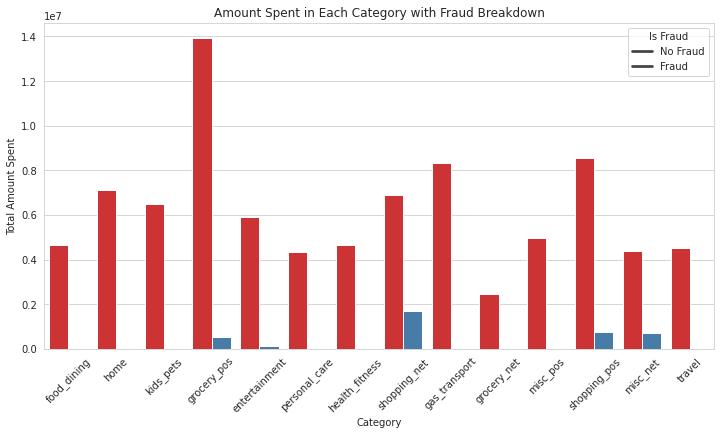

In [0]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Assuming 'spark_df' already exists and contains 'category', 'is_fraud', and 'amt' columns
# Group by 'category' and 'is_fraud' and sum the 'amt' spent in each case
category_fraud_amount = (spark_df
                         .groupBy('category', 'is_fraud')
                         .agg(F.sum('amt').alias('total_amt')))

# Collect the grouped data to be used for plotting
category_fraud_data = category_fraud_amount.collect()

# Convert collected data into separate lists for plotting
categories = [row['category'] for row in category_fraud_data]
is_fraud = [row['is_fraud'] for row in category_fraud_data]
amt = [row['total_amt'] for row in category_fraud_data]

# Create a figure and axis to plot
plt.figure(figsize=(12, 6))

# Create a bar plot using the lists without creating a DataFrame
sns.barplot(x=categories, y=amt, hue=is_fraud, palette='Set1')

# Customizing the plot
plt.title('Amount Spent in Each Category with Fraud Breakdown')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Total Amount Spent')

# Show the plot
plt.legend(title='Is Fraud', loc='upper right', labels=['No Fraud', 'Fraud'])
plt.show()


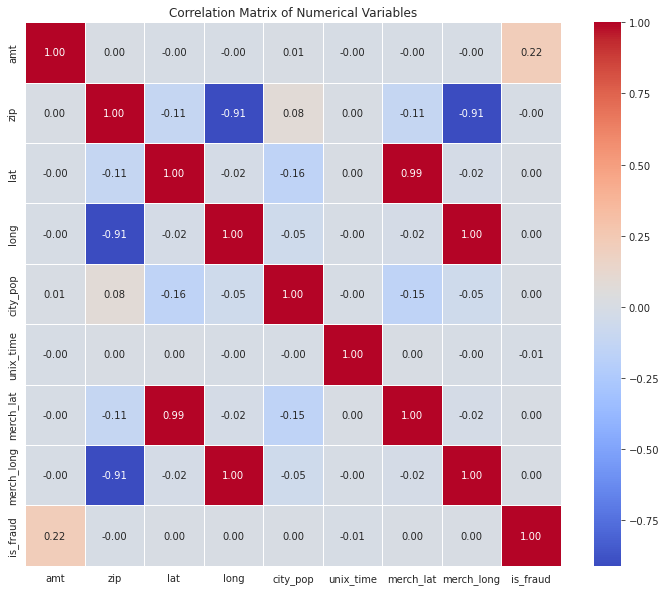

In [0]:
from pyspark.sql.types import NumericType
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for numerical columns in the Spark DataFrame, excluding 'cc_num' and '_c0'
numeric_cols = [field.name for field in spark_df.schema.fields if isinstance(field.dataType, NumericType) and field.name not in ['cc_num', '_c0']]
numeric_df = spark_df.select(numeric_cols)

# Step 2: Convert to Pandas for plotting
pandas_df = numeric_df.toPandas()

# Step 3: Compute the correlation matrix
correlation_matrix = pandas_df.corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

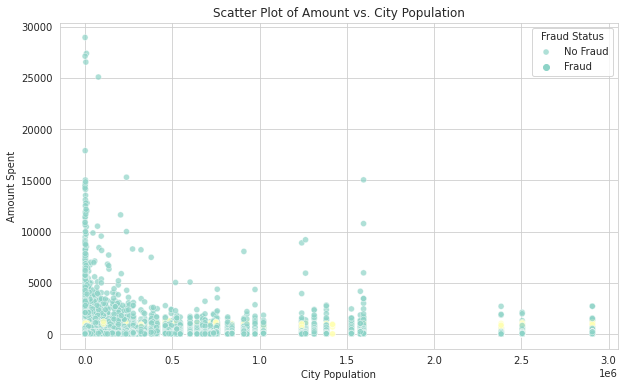

In [0]:
# Convert Spark DataFrame to Pandas for plotting
pandas_df = spark_df.toPandas()

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pandas_df, x='city_pop', y='amt', hue='is_fraud', palette='Set3', alpha=0.7)

# Customizing the plot
plt.title('Scatter Plot of Amount vs. City Population')
plt.xlabel('City Population')  # Change x-axis label to reflect 'city_pop'
plt.ylabel('Amount Spent')  # Change y-axis label to reflect 'amt'

# Legend for fraud status (0 = No Fraud, 1 = Fraud)
plt.legend(title='Fraud Status', loc='upper right', labels=['No Fraud', 'Fraud'])
plt.show()

### Replacing Missing Values - Numerical Variables

In [0]:
#Setting the target variable
target = 'is_fraud'

In [0]:
# categorical variables
dtypes = spark_df.dtypes
cat_input = [] # creates a variable of list type to save the categorical input variables
for i in range(0, len(spark_df.columns)): # iterate over the spark_df variables
  if dtypes[i][1] == 'string': #identify categorical variable
    cat_input.append(dtypes[i][0]) # add te name of the categorical variable to cat_input
cat_input = list(set(cat_input)-set([target, 'zip', 'cc_num', 'first', 'last', 'trans_date_trans_time', 'unix_time', '_c0', 'dob', 'trans_num', 'street'])) 
cat_input

Out[13]: ['job', 'gender', 'city', 'category', 'state', 'merchant']

In [0]:
# numerical variables
num_input = list(set(spark_df.columns) - set([target, 'zip', 'cc_num', 'first', 'last', 'trans_date_trans_time', 'unix_time', '_c0', 'dob', 'trans_num', 'street']) - set(cat_input)) # identifies the numerical input variables 
num_input

Out[14]: ['merch_long', 'long', 'city_pop', 'lat', 'amt', 'merch_lat']

### Create Custom Transformer for Data Imputation

In [0]:
from pyspark.sql.types import DoubleType
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col



class NumericImputer(Transformer, HasInputCol, HasOutputCol): # replacing missing values in numerical columns

    def __init__(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
        super(NumericImputer, self).__init__()  # do not change this part at all when creating custom transformers
        self.setParams(inputCol = inputCol , outputCol = outputCol)  # do not change this part at all when creating custom transformers

        
    def setParams(self, inputCol=None, outputCol=None):  # do not change this part at all when creating custom transformers
      return self._set(inputCol = inputCol, outputCol = outputCol)  # do not change this part at all when creating custom transformers
        

    def _transform(self, dataset):  # do not change this part at all when creating custom transformers

      out_col = self.getOutputCol()  # do not change this part at all when creating custom transformers
      in_col = self.getInputCol()  # do not change this part at all when creating custom transformers
      
      
      
      from pyspark.sql.functions import when  
      from pyspark.sql.types import DoubleType
      median_v = dataset.approxQuantile(in_col, [0.5], 0)[0] # compute median #dataset = dataset.fillna(median_v, subset=in_col)
      return dataset.withColumn(out_col, when(col(in_col).isNull(), median_v).otherwise(col(in_col)).cast(DoubleType())) # replacing null values with median if the value is null otherwise keeping it as is

In [0]:
numericimputers = [] # creating an empty list
for column in num_input: # creating a list of numeric imputers each of which responsible for imputing a variable
  numericimputers.append(NumericImputer(inputCol = column , outputCol = column))
numericimputers

Out[16]: [NumericImputer_0cfd44294624,
 NumericImputer_5a6b6ef7e405,
 NumericImputer_2fe30282783b,
 NumericImputer_10bbf77f1736,
 NumericImputer_dd3e7d1d0a63,
 NumericImputer_c7b219587989]

### Replacing Missing Values - Categorical Variables

In [0]:
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col

class CategoricalImputer(Transformer, HasInputCol, HasOutputCol): # replacing missing values in categorical columns

    def __init__(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
        super(CategoricalImputer, self).__init__()  # do not change this part at all when creating custom transformers
        self.setParams(inputCol = inputCol , outputCol = outputCol)  # do not change this part at all when creating custom transformers

        
    def setParams(self, inputCol=None, outputCol=None):  # do not change this part at all when creating custom transformers
      return self._set(inputCol = inputCol, outputCol = outputCol)  # do not change this part at all when creating custom transformers
        

    def _transform(self, dataset):  # do not change this part at all when creating custom transformers

      out_col = self.getOutputCol()  # do not change this part at all when creating custom transformers
      in_col = self.getInputCol()  # do not change this part at all when creating custom transformers
      
      
      #Groupby column name in_col
      temp = dataset.groupby(in_col).count() # groupby and count the levels (such as how many observations there are for each level)
      temp = temp.filter(temp[in_col]!= 'null') # exclude the null in case the domintaing level is null
      #sort it and convert to pandas
      sorted_df = temp.sort(temp['count'].desc()).toPandas() # sort it find the most occuring level (which is the mode)
      #mode 
      mode_v = sorted_df.loc[0][in_col] # get the mode
      
      return dataset.withColumn(out_col, when(col(in_col).isNull(), mode_v).otherwise(col(in_col))) # repace the nulls with the mode for that variable

In [0]:
cat_imputers = [CategoricalImputer(inputCol = column, outputCol = column) for column in cat_input]
cat_imputers

Out[18]: [CategoricalImputer_7f78e2a236ff,
 CategoricalImputer_eca6472a9f1c,
 CategoricalImputer_e7c12e94bfda,
 CategoricalImputer_f1d5bee6841a,
 CategoricalImputer_4e009f547025,
 CategoricalImputer_ae1f5ee6fb83]

### Normalize Variables

In [0]:
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol
from pyspark.sql.functions import col
from pyspark.sql import functions as F

class Scaler(Transformer, HasInputCol, HasOutputCol):  # We will scale the variables (x-xmin/range)

    def __init__(self, inputCol=None, outputCol=None):  # Do not change this part at all when creating custom transformers
        super(Scaler, self).__init__()  # Do not change this part at all when creating custom transformers
        self.setParams(inputCol=inputCol, outputCol=outputCol)  # Do not change this part at all when creating custom transformers

    def setParams(self, inputCol=None, outputCol=None):  # Do not change this part at all when creating custom transformers
        return self._set(inputCol=inputCol, outputCol=outputCol)  # Do not change this part at all when creating custom transformers

    def _transform(self, dataset):
        out_col = self.getOutputCol()  # Get the out_col
        in_col = col(self.getInputCol())  # Get the input_col
        
        # Find min and max of the input column
        min_max = dataset.select(F.min(in_col).alias("xmin"), F.max(in_col).alias("xmax")).first()
        xmin = min_max['xmin']
        xmax = min_max['xmax']
        
        # Scale the variable and add it to the dataset as a new column
        return dataset.withColumn(out_col, (in_col - xmin) / (xmax - xmin))



In [0]:
scalers = [Scaler(inputCol = column, outputCol = column+"_scaled") for column in num_input]
scalers

Out[20]: [Scaler_a2d3a507fef5,
 Scaler_1093e3069292,
 Scaler_9e36c99a9d31,
 Scaler_dfe751dffcf8,
 Scaler_6ee0b0da4659,
 Scaler_5e04145c6d46]

### Encode Dummy Variables

In [0]:
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input] # this will first create indexers (it means it will number each category in a variable)
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_dummy") for column in cat_input] # This will use the numbers to create the binary variables

### Combine Steps

In [0]:
input_cols = [] # creates an empty list
for i in cat_input: #iterates over categorical variables
  input_cols.append(i+"_dummy") # saves the name of the dummy encoded categorical variables (they are not categorical now though)
for i in num_input: # iterates over the numerical variables
  input_cols.append(i+"_scaled") # saves the name of standardized numerical variables
input_cols

Out[22]: ['job_dummy',
 'gender_dummy',
 'city_dummy',
 'category_dummy',
 'state_dummy',
 'merchant_dummy',
 'merch_long_scaled',
 'long_scaled',
 'city_pop_scaled',
 'lat_scaled',
 'amt_scaled',
 'merch_lat_scaled']

In [0]:
# your code goes in here
from pyspark.ml.feature import StringIndexer
import functools 
import operator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

stages = []
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") #conactenates all input variables and names as features [[0,1,0],30,20,40000]
stages = functools.reduce(operator.concat, [numericimputers, cat_imputers, indexers, encoders, scalers]) #indexers,  encoders, standardizers])
stages.append(assembler)
stages



Out[23]: [NumericImputer_0cfd44294624,
 NumericImputer_5a6b6ef7e405,
 NumericImputer_2fe30282783b,
 NumericImputer_10bbf77f1736,
 NumericImputer_dd3e7d1d0a63,
 NumericImputer_c7b219587989,
 CategoricalImputer_7f78e2a236ff,
 CategoricalImputer_eca6472a9f1c,
 CategoricalImputer_e7c12e94bfda,
 CategoricalImputer_f1d5bee6841a,
 CategoricalImputer_4e009f547025,
 CategoricalImputer_ae1f5ee6fb83,
 StringIndexer_a4a582fa12fc,
 StringIndexer_97ef64d4d3b4,
 StringIndexer_26b4be17aa3c,
 StringIndexer_f997f1eec554,
 StringIndexer_61b816ca8078,
 StringIndexer_5a6e85a883a2,
 OneHotEncoder_afa718f13b3a,
 OneHotEncoder_6d2812e1689d,
 OneHotEncoder_930c2bc480f4,
 OneHotEncoder_6f0f20b76014,
 OneHotEncoder_324116361573,
 OneHotEncoder_4507a14c4250,
 Scaler_a2d3a507fef5,
 Scaler_1093e3069292,
 Scaler_9e36c99a9d31,
 Scaler_dfe751dffcf8,
 Scaler_6ee0b0da4659,
 Scaler_5e04145c6d46,
 VectorAssembler_c249000234fe]

### Run Pipeline

In [0]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import when
pipeline = Pipeline(stages=stages) # creates the pipeline object
spark_df = pipeline.fit(spark_df).transform(spark_df) # runs the pipeline

### Create Training & Testing

In [0]:
train, test = spark_df.randomSplit([0.7, 0.3], seed = 2018) # divides the dataset into training and testing
print("Training Dataset Count: " + str(train.count())) # gives hpow many observations in the training set
print("Test Dataset Count: " + str(test.count())) # gives how many observations in the test set

Training Dataset Count: 907286
Test Dataset Count: 389389


### Create Logistic Regression

In [0]:
lr = LogisticRegression(labelCol=target, featuresCol="features", maxIter=10) # creates a logistic regression instance (model)
logRegModel = lr.fit(train) # trains the model

In [0]:
print("Logistic Regression Model - Prediction and Probability Outputs")
logRegModel.transform(train).select('probability', 'prediction').toPandas() # gets the model probabilities and classes

Logistic Regression Model - Prediction and Probability Outputs


,probability,prediction
0,"[0.9998666566559117, 0.00013334334408832138]",0.0
1,"[0.9999968908774095, 3.109122590494451e-06]",0.0
2,"[0.9840572778381761, 0.015942722161823908]",0.0
3,"[0.9999555343745453, 4.446562545468158e-05]",0.0
4,"[0.9953615600458556, 0.004638439954144369]",0.0
...,...,...
907281,"[0.9999199514237266, 8.00485762734171e-05]",0.0
907282,"[0.9979631479986172, 0.002036852001382816]",0.0
907283,"[0.9978306687833545, 0.0021693312166455314]",0.0
907284,"[0.998939849714233, 0.001060150285767003]",0.0


### Model Parameters (Logistic Regression)

In [0]:
print("Coefficients: \n" + str(logRegModel.coefficientMatrix)) # gives the model coef
print("Intercept: " + str(logRegModel.interceptVector)) # gives the model intercept

Coefficients: 
DenseMatrix([[ 1.18557037e-01, -7.44421047e-03,  5.31596143e-01, ...,
              -5.22173709e-02,  9.19930737e+01, -1.51185323e-01]])
Intercept: [-7.723782081804844]


###  Performance checks (Logistic Regression)

In [0]:
print("Logistic Regression Model Summary")
summary = logRegModel.summary # gets the modelo summary and saves it as summary
accuracy = summary.accuracy # access the accuracy within model summary
falsePositiveRate = summary.weightedFalsePositiveRate # access the FPR within model summary
truePositiveRate = summary.weightedTruePositiveRate # access the TPR within model summary
fMeasure = summary.weightedFMeasure() # access the FM within model summary
precision = summary.weightedPrecision # access the precision within model summary
recall = summary.weightedRecall # access the recall within model summary
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Logistic Regression Model Summary
Accuracy: 0.9943149128279286
FPR: 0.8906785717574341
TPR: 0.9943149128279286
F-measure: 0.9923648809694998
Precision: 0.9922699693170269
Recall: 0.9943149128279286


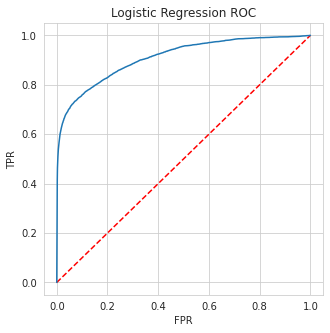

In [0]:
import matplotlib.pyplot as plt # imparts matplotlib for viz
plt.figure(figsize=(5,5)) # determines the figure size 
plt.plot([0, 1], [0, 1], 'r--') # (draws the diagonal red line - random decision line)
plt.plot(summary.roc.select('FPR').collect(), # plots the FPR vs TPR
         summary.roc.select('TPR').collect())
plt.title('Logistic Regression ROC')
plt.xlabel('FPR') # names the x axis
plt.ylabel('TPR')  # names the y axis
display(plt.show()) # displays the plot

In [0]:
predictions = logRegModel.transform(test) # takes the test data and makes predictions
predictions = predictions.withColumnRenamed("is_fraud", "label") # rename the class column as label (actual values)
predictions.select('label', 'prediction', 'probability').show(10) # selects the actual, predicted, and probability

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.99978866694348...|
|    0|       0.0|[0.99886285168158...|
|    0|       0.0|[0.98836665272470...|
|    0|       0.0|[0.98971473737325...|
|    0|       0.0|[0.99392567152146...|
|    0|       0.0|[0.99556991753392...|
|    0|       0.0|[0.99983641168838...|
|    0|       0.0|[0.96722362107000...|
|    0|       0.0|[0.98455190619756...|
|    0|       0.0|[0.99997580136512...|
+-----+----------+--------------------+
only showing top 10 rows



In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions)) # evaluates the results using the predictions dataframe above

Test Area Under ROC 0.8751387753116779


## Decision Tree Classifier

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create a Decision Tree instance
dt = DecisionTreeClassifier(labelCol=target, featuresCol="features")

# Train the model
decisionTreeModel = dt.fit(train)

In [0]:
import warnings

# Suppress specific warnings related to Arrow and conversion
warnings.filterwarnings("ignore", category=UserWarning, message="toPandas attempted Arrow optimization")
print("Decision Tree Model - Prediction and Probability Outputs")
decisionTreeModel.transform(train).select('probability', 'prediction').toPandas()


Decision Tree Model - Prediction and Probability Outputs


,probability,prediction
0,"[0.9985413073675392, 0.001458692632460819]",0.0
1,"[0.9985413073675392, 0.001458692632460819]",0.0
2,"[0.9985413073675392, 0.001458692632460819]",0.0
3,"[0.9985413073675392, 0.001458692632460819]",0.0
4,"[0.9985413073675392, 0.001458692632460819]",0.0
...,...,...
907281,"[0.9985413073675392, 0.001458692632460819]",0.0
907282,"[0.9985413073675392, 0.001458692632460819]",0.0
907283,"[0.9985413073675392, 0.001458692632460819]",0.0
907284,"[0.9985413073675392, 0.001458692632460819]",0.0


##Performance (Decision Tree)

In [0]:
print("Depth of the tree: ", decisionTreeModel.depth)
print("Number of nodes in the tree: ", decisionTreeModel.numNodes)
print("Feature Importances: \n" + str(decisionTreeModel.featureImportances))
tree_string = decisionTreeModel.toDebugString
print("Decision Tree Structure:\n", tree_string)

Depth of the tree:  5
Number of nodes in the tree:  25
Feature Importances: 
(2148,[51,488,489,493,1330,1331,1388,1392,1415,2144,2146],[0.002600640977307172,0.0028518322793270197,0.0021389108286578155,0.20304615024429915,0.0028518583194513236,0.0021389254766418374,0.2741231452146805,0.062010984384638444,0.004016775997517877,0.09916034720257312,0.3450604290749056])
Decision Tree Structure:
 DecisionTreeClassificationModel: uid=DecisionTreeClassifier_55ee9b4d2bfe, depth=5, numNodes=25, numClasses=2, numFeatures=2148
  If (feature 2146 <= 0.007886927894596843)
   If (feature 488 in {1.0})
    Predict: 1.0
   Else (feature 488 not in {1.0})
    If (feature 1330 in {1.0})
     Predict: 1.0
    Else (feature 1330 not in {1.0})
     If (feature 489 in {1.0})
      Predict: 1.0
     Else (feature 489 not in {1.0})
      If (feature 1331 in {1.0})
       Predict: 1.0
      Else (feature 1331 not in {1.0})
       Predict: 0.0
  Else (feature 2146 > 0.007886927894596843)
   If (feature 1388 in {1

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Calculate metrics
accuracy = evaluator.evaluate(predictions)  # Accuracy
fMeasure = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})  # F1 score
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})  # Weighted Precision
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})  # Weighted Recall

# Display results
print("Decision Tree Model Summary")
print("Accuracy: %s" % accuracy)
print("F-measure (F1 Score): %s" % fMeasure)
print("Precision: %s" % precision)
print("Recall: %s" % recall)

Decision Tree Model Summary
Accuracy: 0.9925052020027509
F-measure (F1 Score): 0.9925052020027509
Precision: 0.9922480266161049
Recall: 0.994360395388673


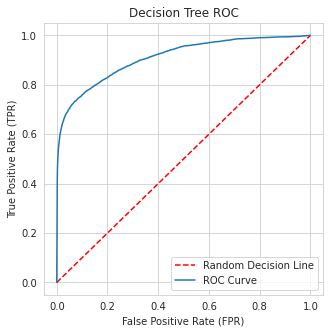

In [0]:
import matplotlib.pyplot as plt
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--', label="Random Decision Line")  
plt.plot(summary.roc.select('FPR').collect(),  # ROC Curve
         summary.roc.select('TPR').collect(), label="ROC Curve")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="best")
plt.title("Decision Tree ROC")
plt.show()